# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [62]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [63]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное (RM, MEDV)
2.   Равномерное (нет)
3.   Биноминальное (LSTAT)
4.   Бернулли (нет)
5.   Геометрическое (DIS, CRIM, ZN)
6.   Логнормальное (нет)



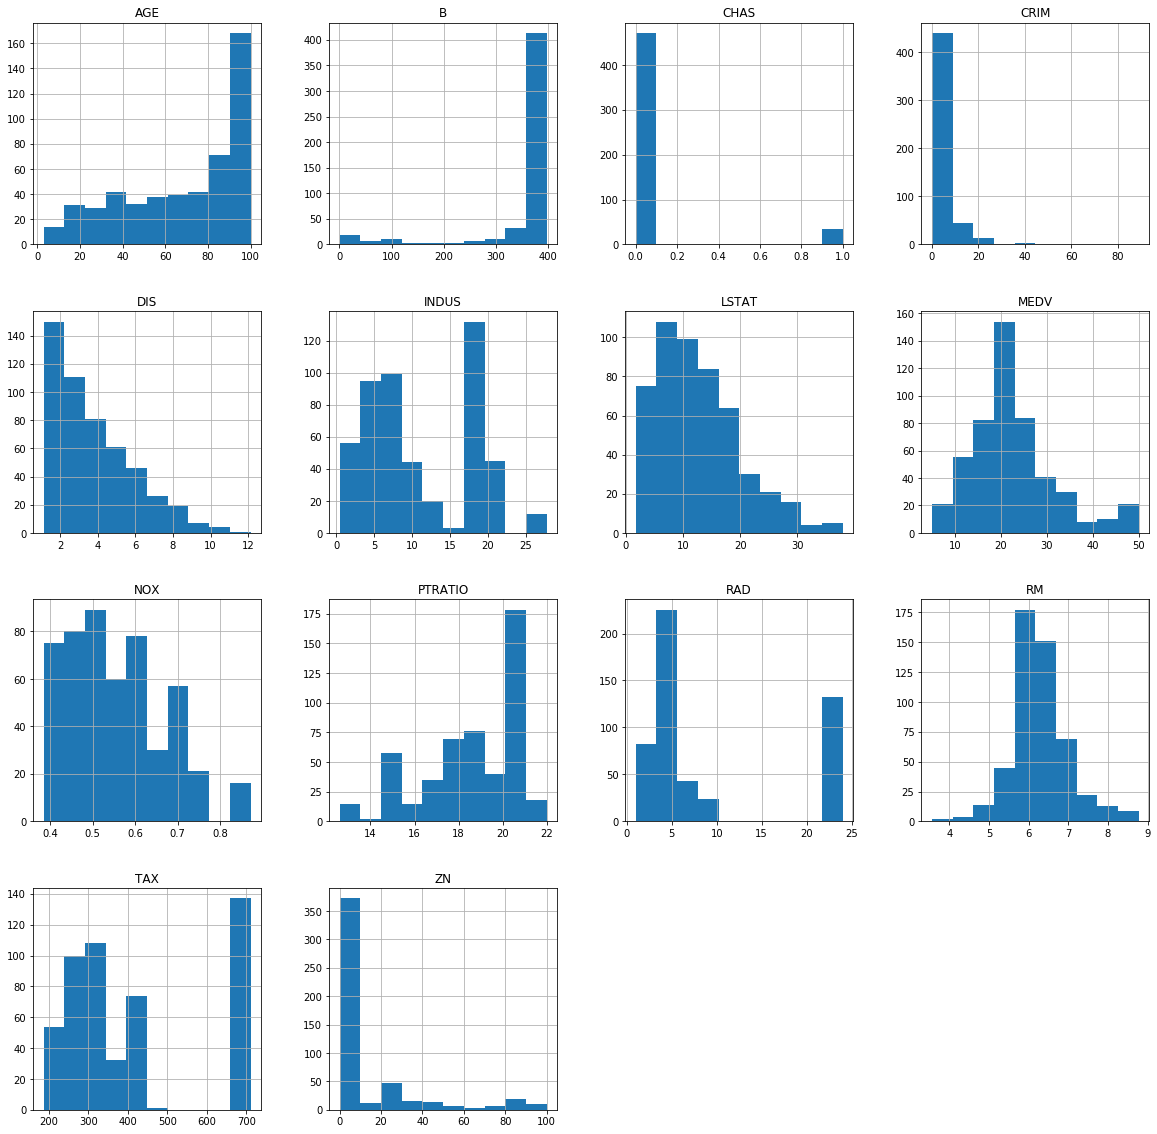

In [64]:
data.hist(figsize=(20,20))
plt.show()

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

MEDV наиболее коррелирует со столбцами LSTAT, -0.74 обратная зависимость и RM, 0.7 (количество комнат) прямая зависимость

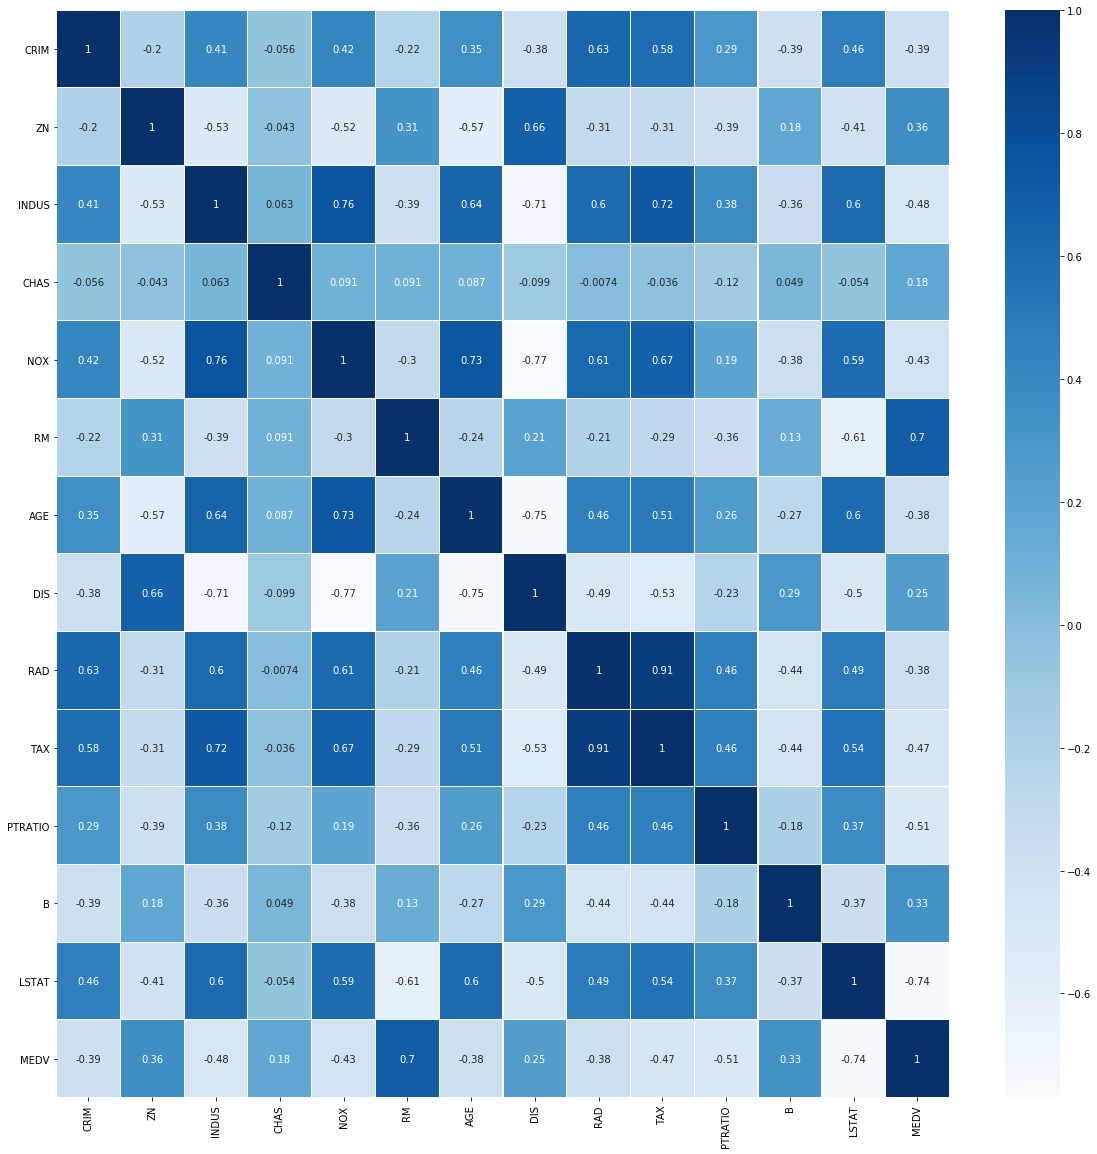

In [65]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='Blues',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
model=LinearRegression()

price=data['MEDV']
lower_status=data['LSTAT']
price=np.array(price).reshape(-1,1)
lower_status=np.array(lower_status).reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    lower_status,
    price,
    test_size = 0.2
)

In [67]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
model.score(X_test, y_test)

0.5539193216566927

In [69]:
predicted_y=model.predict(X_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

35.705410981258886
4.565324017576331


(-10, 60)

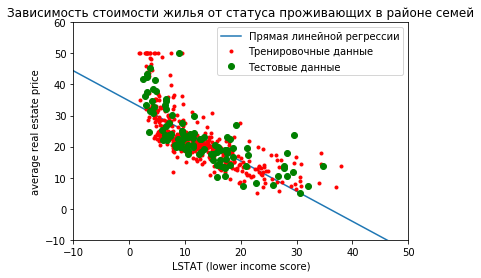

In [70]:
plt.xlabel('LSTAT (lower income score)')
plt.ylabel('average real estate price')
plt.title('Зависимость стоимости жилья от статуса проживающих в районе семей')

x=np.linspace(-50,200,100)
y=model.coef_*x+model.intercept_
y=np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.xlim(-10,50)
plt.ylim(-10,60)

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [71]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [73]:
data.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [74]:
data.isnull().sum(axis = 0)
# нет отсутствующих значений в country

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [75]:
sum(data.isnull().sum(axis = 0))

23

Сколько стран в выборке? Написать ответ. 

In [76]:
len(data['Country (region)'].unique())

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [77]:
np.round_(data.corr(), decimals=2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


1. Уровень ВВП, социальная поддержка, уровень здравоохранение - факторы, влияющие на счастье
2. Социальная поддержка, уровень ВВП и уровень здравоохранения коррелируют друг с другом.
3. Коррупция не коррелирует значительно ни с одним из показателей

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

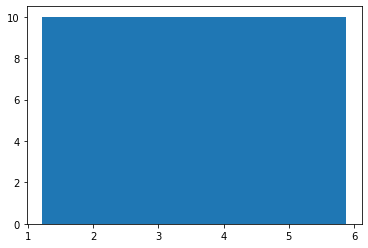

In [78]:
number_of_randoms = 10
plt.hist(np.random.uniform(1,6,number_of_randoms),1)
plt.show()

это равномерное распределение (вероятность выпадения любого значения одинакова)

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

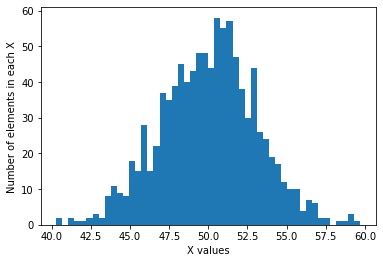

In [79]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(np.random.rand(100))#/number_of_randoms
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

График изменился, потому что это уже гистограмма суммы исходов одинаково распределенных, независимых, случайных величин

Можно применить центральную предельную теорему, т.к. распределение стало нормальным